In [1]:
import os
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('features.csv')
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,StoreType
0,1,2010/2/5,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A
1,1,2010/2/12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A
2,1,2010/2/19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A
3,1,2010/2/26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A
4,1,2010/3/5,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013/6/28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B
8186,45,2013/7/5,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B
8187,45,2013/7/12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B
8188,45,2013/7/19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B


In [2]:
df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'StoreType'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
 12  StoreType     8190 non-null   object 
dtypes: bool(1), float64(9), int64(1), object(2)
memory usage: 775.9+ KB


In [4]:
df.describe


<bound method NDFrame.describe of       Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1   2010/2/5        42.31       2.572        NaN        NaN   
1         1  2010/2/12        38.51       2.548        NaN        NaN   
2         1  2010/2/19        39.93       2.514        NaN        NaN   
3         1  2010/2/26        46.63       2.561        NaN        NaN   
4         1   2010/3/5        46.50       2.625        NaN        NaN   
...     ...        ...          ...         ...        ...        ...   
8185     45  2013/6/28        76.05       3.639    4842.29     975.03   
8186     45   2013/7/5        77.50       3.614    9090.48    2268.58   
8187     45  2013/7/12        79.37       3.614    3789.94    1827.31   
8188     45  2013/7/19        82.84       3.737    2961.49    1047.07   
8189     45  2013/7/26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  \
0          

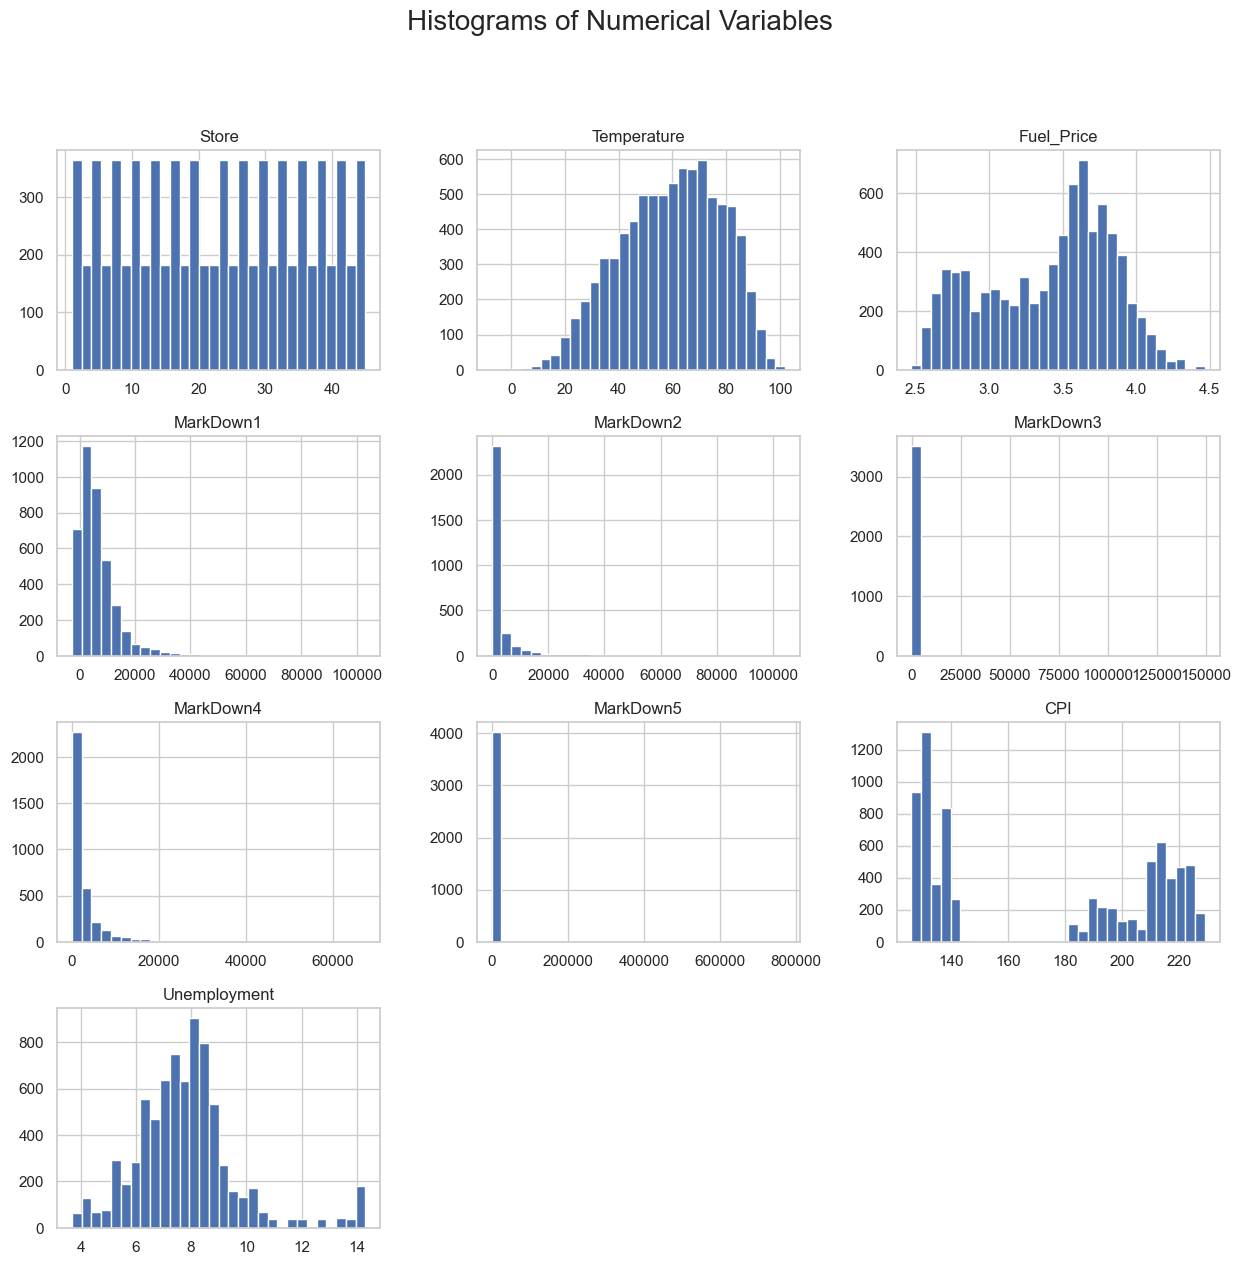

In [5]:
sns.set(style="whitegrid")

# Plot histograms for numerical variables
df.hist(bins=30, figsize=(15, 14))
plt.suptitle('Histograms of Numerical Variables', fontsize=20)
plt.show()

<Axes: >

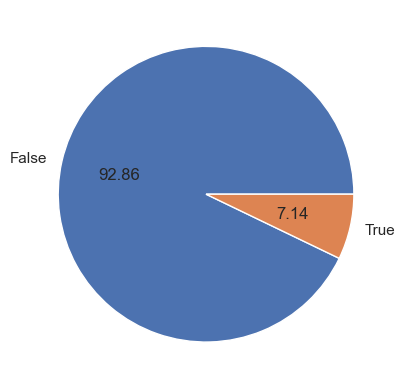

In [6]:
df.groupby('IsHoliday').size().plot(kind='pie', autopct='%.2f')

Unemployment rate v/s time

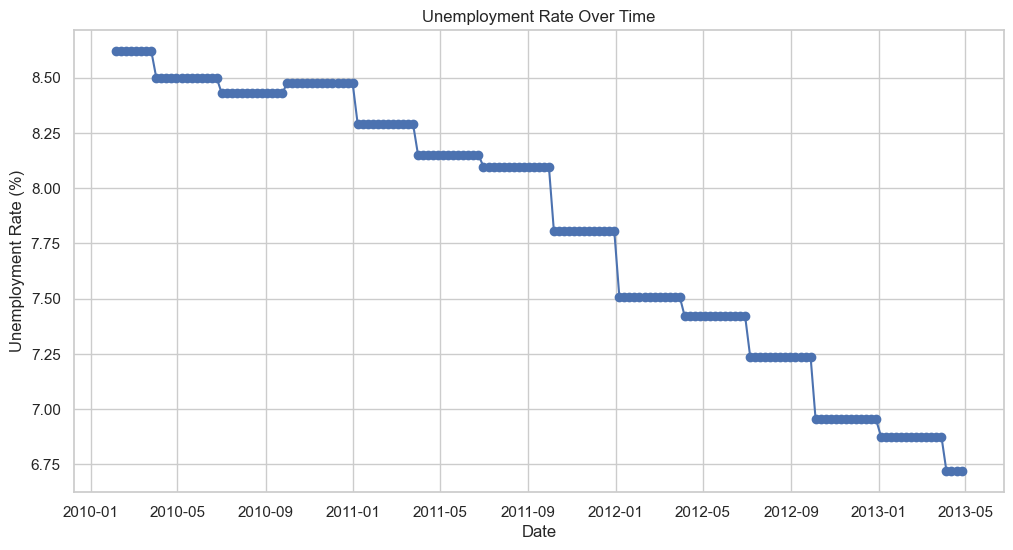

In [7]:
df['Date'] = pd.to_datetime(df['Date'])  

df_grouped = df.groupby('Date')['Unemployment'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Date'], df_grouped['Unemployment'], marker='o', linestyle='-')


plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')

plt.grid(True)
plt.show()


CPI Index v/s time

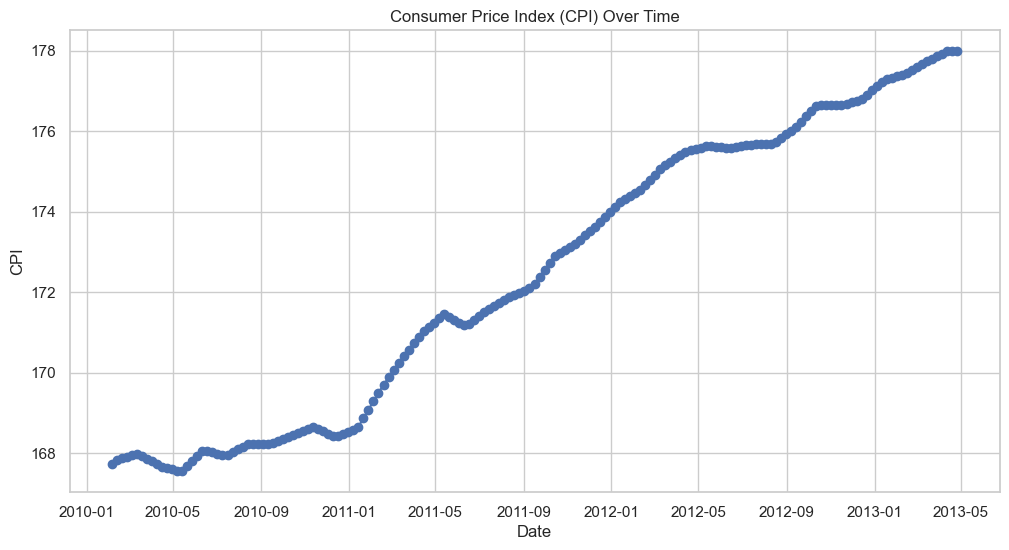

In [8]:
df_grouped_cpi = df.groupby('Date')['CPI'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_cpi['Date'], df_grouped_cpi['CPI'], marker='o', linestyle='-')

# Adding titles and labels
plt.title('Consumer Price Index (CPI) Over Time')
plt.xlabel('Date')
plt.ylabel('CPI')

# Show plot
plt.grid(True)
plt.show()

Fuel Price v/s time

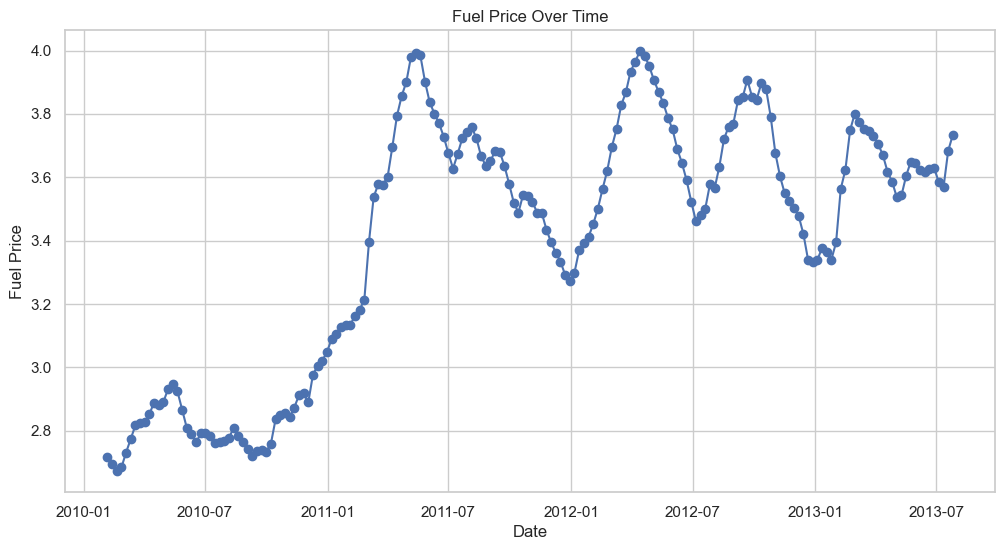

In [9]:
df_grouped_fuel_price = df.groupby('Date')['Fuel_Price'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped_fuel_price['Date'], df_grouped_fuel_price['Fuel_Price'], marker='o', linestyle='-')

# Adding titles and labels
plt.title('Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Fuel Price')

# Show plot
plt.grid(True)
plt.show()

In [10]:
df['CPI'].fillna(df['CPI'].median(),inplace=True)
df['Unemployment'].fillna(df['Unemployment'].median(),inplace=True)

/var/folders/xl/0n0x3hs54qg2k2_bgw7qrqzh0000gn/T/ipykernel_53404/870444647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CPI'].fillna(df['CPI'].median(),inplace=True)
/var/folders/xl/0n0x3hs54qg2k2_bgw7qrqzh0000gn/T/ipykernel_53404/870444647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [11]:
for i in range(1, 6):
    df["MarkDown" + str(i)] = df["MarkDown" + str(i)].apply(lambda x: 0 if x < 0 else x)
    df["MarkDown" + str(i)].fillna(value=0, inplace=True)

/var/folders/xl/0n0x3hs54qg2k2_bgw7qrqzh0000gn/T/ipykernel_53404/3473623446.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MarkDown" + str(i)].fillna(value=0, inplace=True)


In [12]:
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,StoreType
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,A
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,A
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,A
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,False,B
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,False,B
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,False,B
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,False,B


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['IsHoliday'] = le.fit_transform(df['IsHoliday'])
df['StoreType'] = le.fit_transform(df['StoreType'])
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,StoreType
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,0
1,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,1,0
2,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,0
3,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,0
4,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.764003,7.806,0,1
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.764003,7.806,0,1
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.764003,7.806,0,1
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.764003,7.806,0,1


In [14]:
df['IsHoliday'].nunique()

2

In [15]:
df['StoreType'].nunique()

3

In [16]:
df_train = pd.read_csv('train.csv')
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [17]:
# Convert store columns to string to ensure consistency
df['Store'] = df['Store'].astype(str)
df_train['Store'] = df_train['Store'].astype(str)

# Convert date columns to datetime if they are not already
df['Date'] = pd.to_datetime(df['Date'])
df_train['Date'] = pd.to_datetime(df_train['Date'])

# Strip any leading/trailing spaces in the store columns
df['Store'] = df['Store'].str.strip()
df_train['Store'] = df_train['Store'].str.strip()


In [18]:
final_df = pd.merge(df, df_train, on=['Store', 'Date'], how='inner')
final_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,StoreType,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,0,1,24924.50,False
1,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,0,2,50605.27,False
2,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,0,3,13740.12,False
3,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,0,4,39954.04,False
4,1,2010-02-05,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,0,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,93,2487.80,False
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,94,5203.31,False
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,95,56017.47,False
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,1,97,6817.48,False


In [19]:
final_df['IsHoliday_x'].isin(final_df['IsHoliday_y']).all()


True

In [20]:
agg_data = final_df.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.head()

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.42,11330.286495


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

final_df['IsHoliday_x'] = le.fit_transform(final_df['IsHoliday_x'])
final_df['Storeype'] = le.fit_transform(final_df['StoreType'])

Plotting Stores by Weekly Sales

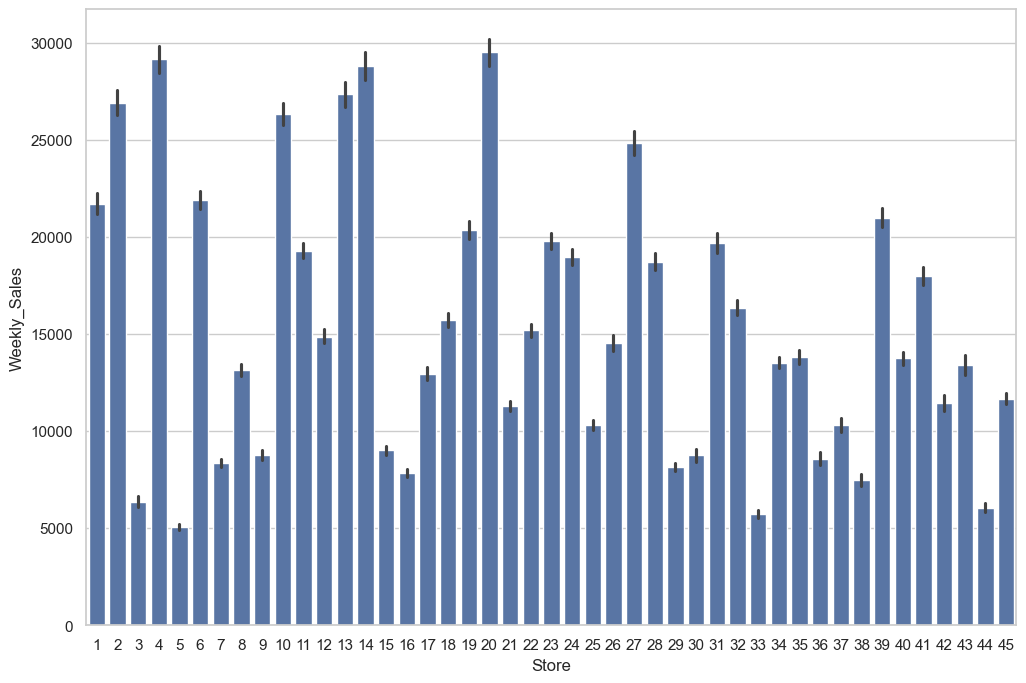

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x='Store',y='Weekly_Sales',data=final_df)
plt.show()

In [23]:
final_df['Store'] = final_df['Store'].astype(int)

# Aggregating weekly sales by stores
total_sales = final_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sorting stores by total weekly sales in descending order
total_sales = total_sales.sort_values(by='Weekly_Sales', ascending=False)

total_sales

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08
9,10,2.716177e+08
26,27,2.538559e+08
5,6,2.237561e+08
0,1,2.224028e+08
38,39,2.074455e+08


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the features for the model (excluding the target variable 'weekly_sales' and 'date')
features = final_df.drop(columns=['Weekly_Sales', 'Date'])

# Target variable
target = final_df['Weekly_Sales']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Optimized visualization: Randomly sample a subset of data for scatter plots
sampled_df = final_df.sample(n=10000, random_state=42)  # Randomly sample 10,000 records

# Pairplot for key features vs Weekly_Sales (sampled data)
key_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
sns.pairplot(sampled_df, x_vars=key_features, y_vars='Weekly_Sales', height=4, aspect=0.8, kind='reg')
plt.suptitle('Relationships Between Key Features and Weekly Sales (Sampled Data)', y=1.02)
plt.show()

In [ ]:
# Function to plot weekly sales trend for a given store
def plot_weekly_sales(store_id):
# Filter data for the selected store
store_data = final_df[final_df['Store'] == store_id]
store_data = store_data.sort_values(by='Date')  # Sort by date

# Line plot of Weekly_Sales over time
plt.figure(figsize=(12, 6))
plt.plot(store_data['Date'], store_data['Weekly_Sales'], marker='o', linestyle='-', label=f'Store {store_id}')
plt.title(f'Weekly Sales Trend Over Time (Store {store_id})')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Plot for Store 1
plot_weekly_sales(store_id=1)

# Plot for Store 2
plot_weekly_sales(store_id=2)

# Plot for Store 3
plot_weekly_sales(store_id=3)

In [26]:
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)

492767774.1430155


In [27]:
print(r2)

0.06268926751734127


Linear Regression does not yield good results because the data does not exhibit a linear relationship.

Model: Random Forest Regression (n_est = 50)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your dataset
data = final_df
# Preprocess and select relevant features (example)
features = data[['CPI', 'Fuel_Price', 'Unemployment']]
target = data['Weekly_Sales']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


In [28]:
import time

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [29]:
# Start time
start_time = time.time()
rf_model_1 = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model_1.fit(X_train, y_train)
rf_pred_1 = rf_model_1.predict(X_test)
rf_mse_1 = mean_squared_error(y_test, rf_pred_1)
rf_r2_1 = r2_score(y_test, rf_pred_1)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_1)

Execution Time:  1.4000582019488017
R^2 VALUE:  0.9455878831164782


Model: Random Forest Regression (n_est = 50, max_depth = 100)

In [30]:
# Model: Random Forest Regressor (n_estimators=50, max_depth=100)
# Start time
start_time = time.time()
rf_model_1_100 = RandomForestRegressor(n_estimators=50, max_depth=100, random_state=42)
rf_model_1_100.fit(X_train, y_train)
rf_pred_1_100  = rf_model_1_100.predict(X_test)
rf_mse_1_100 = mean_squared_error(y_test, rf_pred_1_100)
rf_r2_1_100 = r2_score(y_test, rf_pred_1_100)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_1_100)

Execution Time:  1.434492333730062
R^2 VALUE:  0.9455878831164782


Model: Random Forest Regression (n_est = 100)¶

In [31]:
# Model: Random Forest Regressor (n_estimators=100)
# Start time
start_time = time.time()
rf_model_2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_2.fit(X_train, y_train)
rf_pred_2 = rf_model_2.predict(X_test)
rf_mse_2 = mean_squared_error(y_test, rf_pred_2)
rf_r2_2 = r2_score(y_test, rf_pred_2)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_2)

Execution Time:  2.7146920363108316
R^2 VALUE:  0.9465919016684707


Model: Random Forest Regression (n_est = 100, max_depth = 100)

In [32]:
#Model: Random Forest Regressor (n_estimators=100)
# Start time
start_time = time.time()
rf_model_2_100 = RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42)
rf_model_2_100.fit(X_train, y_train)
rf_pred_2_100 = rf_model_2_100.predict(X_test)
rf_mse_2_100 = mean_squared_error(y_test, rf_pred_2_100)
rf_r2_2_100 = r2_score(y_test, rf_pred_2_100)
# End time
end_time = time.time()

# Calculate the execution time in minutes
execution_time = (end_time - start_time) / 60
print("Execution Time: ", execution_time)
print("R^2 VALUE: ", rf_r2_2_100)

Execution Time:  2.670314733187358
R^2 VALUE:  0.9465919016684707


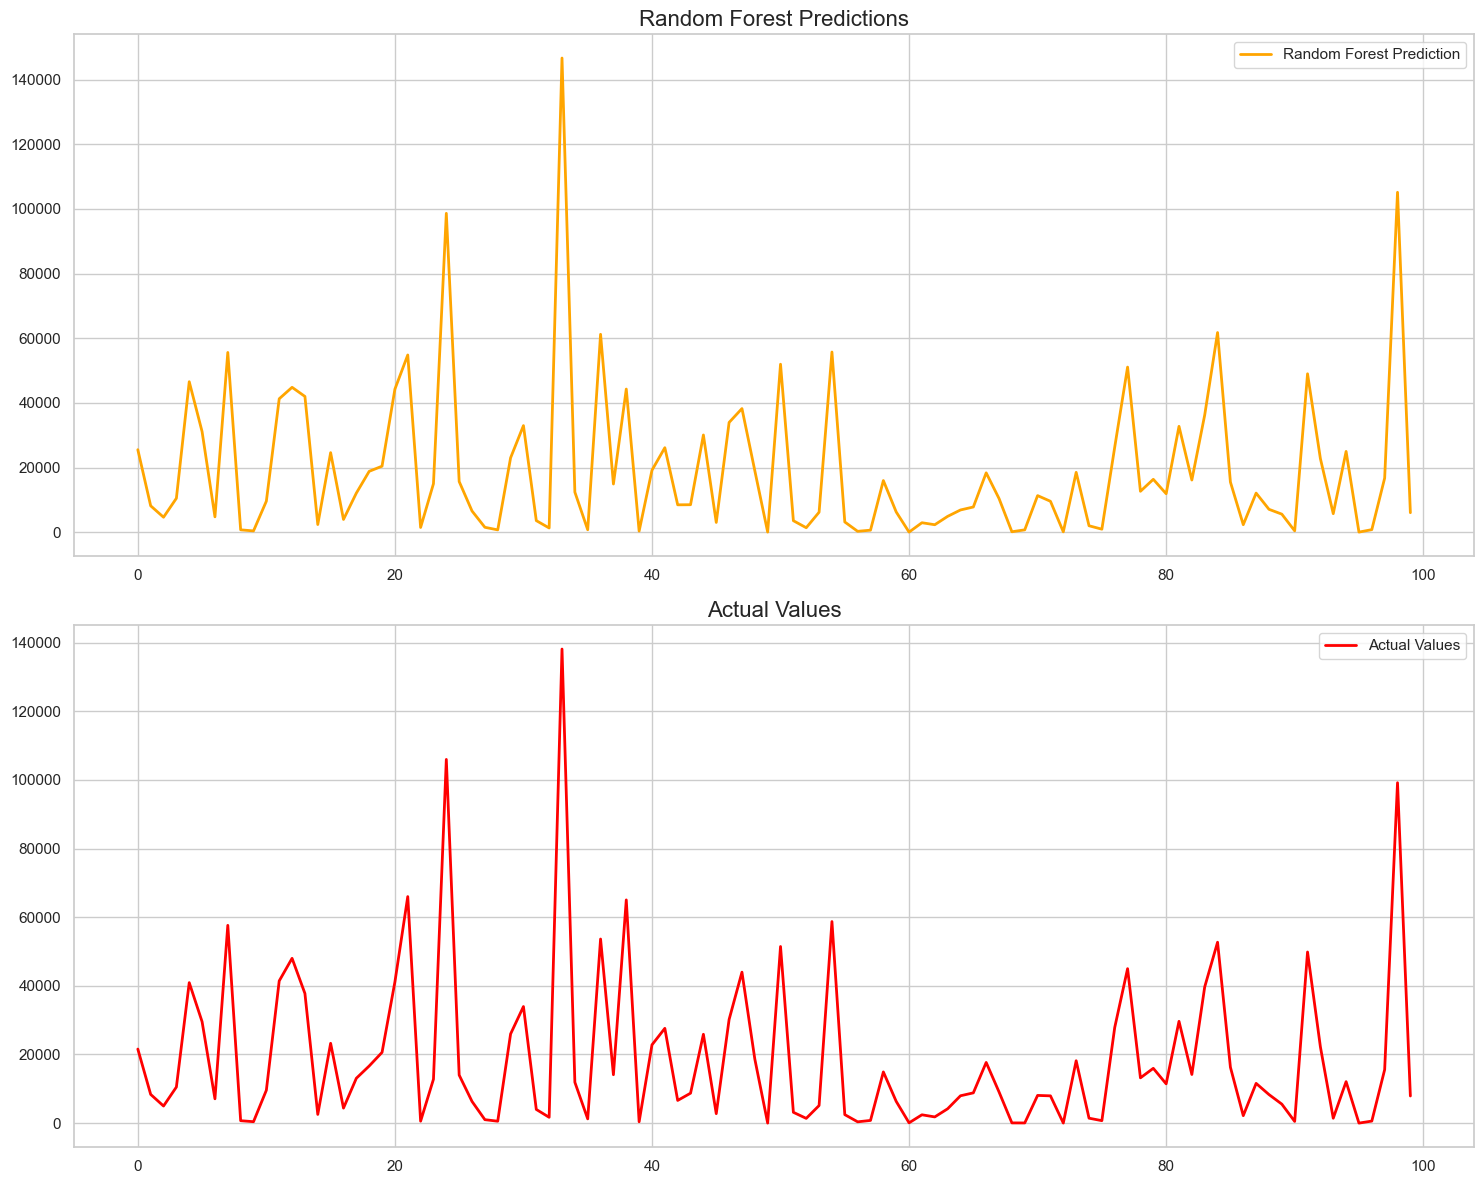

In [33]:
# Select a subset of the test data for visualization
n = 100  # Number of points to plot
y_test_subset = y_test[:n].values

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15,12))

# First subplot: Random Forest predictions
ax[0].plot(rf_pred_2_100[:n], label="Random Forest Prediction", linewidth=2.0, color='orange')
ax[0].set_title('Random Forest Predictions', fontsize=16)
ax[0].legend(loc="best")

# Second subplot: Actual values
ax[1].plot(y_test_subset, label="Actual Values", linewidth=2.0, color='red')
ax[1].set_title('Actual Values', fontsize=16)
ax[1].legend(loc="best")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()